In [78]:
import pandas as pd
from math import sqrt
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error


In [79]:
df = pd.read_csv('opsd_austria_daily.csv')
df['Date'] = pd.to_datetime(df['Date'])

df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month


In [80]:
def clean(dataset, columns):
    dataset[columns].replace(0, np.nan, inplace=True)
    dataset[columns].fillna(method='ffill', inplace=True) 
clean(df,'Wind_production')
clean(df,'Electricity_consumption')
clean(df,'Solar_production')
clean(df,'Wind+Solar')

In [81]:
df['Delta']=df['Electricity_consumption']-df['Wind+Solar']

In [82]:
features = ['Electricity_consumption','Wind_production','Month','Solar_production','Wind+Solar','Delta','Price']
df_vis=df.loc[df['Year']==2019, features]

Как видно из графика ниже, наблюдается существенная нехватка энергетических ресурсов, которая не компенсируется производством экологически чистых типов энергии. Последние компенсируют лишь приблизительно 13% спроса на энергию. Средняя выручка от продажи газа для компенсации энергетического голода составит свыше 100000000.

In [83]:
mean_c=df['Electricity_consumption'].mean()
mean_e=df['Wind+Solar'].mean()
fr=mean_e/mean_c

In [84]:
fr

0.12227811904209862

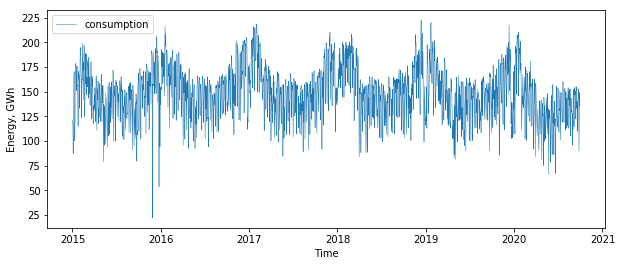

In [85]:
fig,ax = plt.subplots(figsize=(10,4))
ax.plot(df['Date'],df['Delta'], linewidth = 0.5, label='consumption') 

ax.set_xlabel('Time')
ax.set_ylabel('Energy, GWh')
ax.legend(loc='best')
plt.show()


In [86]:
Price_GW=df['Price']*1000000

In [87]:
df['Price_Delta']=Price_GW*df['Delta']

In [88]:
df['Price_Delta'].mean()

126593279.72299781

In [89]:
df.to_csv('opsd_austria_updated.csv')